In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import os
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

In [2]:
#import CSV file
df = pd.read_csv('Resources/Data/winequality-red.csv', delimiter=';')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
df.drop_duplicates(keep= 'first', inplace = False)
df.dropna(axis = 'columns', how='all')
df.reset_index(drop =True)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [4]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [5]:
df.shape

(1599, 12)

In [6]:
#Features for Quality
bins = [2,6,9]
labels = ['Fair', 'Very Good']
df['quality'] = pd.cut(df['quality'], bins=bins, labels=labels) 

In [7]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Fair
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Fair
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,Fair
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,Fair
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Fair


In [8]:
# Assign X (factors) and y (quality)
X = df.drop("quality", axis=1)
y = df["quality"]
print(X.shape, y.shape)

(1599, 11) (1599,)


In [9]:
df['quality'].value_counts()

Fair         1382
Very Good     217
Name: quality, dtype: int64

In [10]:
#Top5Features
top5_features= X[['alcohol', 'sulphates', 'volatile acidity', 'citric acid', 'density']]

# Train Test

### All Features

In [11]:
#All features
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
X_value, X_test, y_value, y_test= train_test_split(X, y, random_state=42)

In [12]:
X_train.shape, X_value.shape, X_test.shape

((1199, 11), (1199, 11), (400, 11))

In [13]:
# Create a StandardScater model and fit it to the training data

X_scaler = StandardScaler().fit(X_train)

In [14]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [15]:
print(X_train_scaled.shape, X_test_scaled.shape, y_train.shape)

(1199, 11) (400, 11) (1199,)


### KNN

In [16]:
# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")

k: 1, Train/Test Score: 1.000/0.892
k: 3, Train/Test Score: 0.932/0.873
k: 5, Train/Test Score: 0.907/0.895
k: 7, Train/Test Score: 0.888/0.890
k: 9, Train/Test Score: 0.885/0.890
k: 11, Train/Test Score: 0.879/0.885
k: 13, Train/Test Score: 0.880/0.892
k: 15, Train/Test Score: 0.878/0.880
k: 17, Train/Test Score: 0.877/0.870
k: 19, Train/Test Score: 0.881/0.873


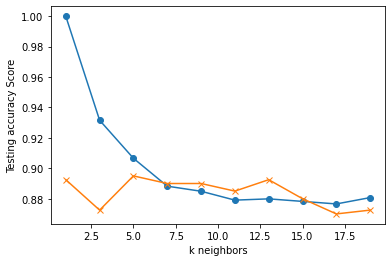

In [17]:
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.savefig('Resources/images/red_all_features_KNN.jpg')
plt.show()

In [18]:
 # Note that k: 11 seems to be the best choice for this dataset
knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(X_train_scaled, y_train)
print('k=11 Test Acc: %.3f' % knn.score(X_test_scaled, y_test))

k=11 Test Acc: 0.885


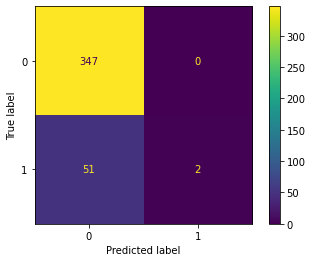

In [19]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

y_pred = knn.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

cm_display = ConfusionMatrixDisplay(cm).plot()
plt.savefig('Resources/images/red_all_features_confu_KNN.jpg')

### Top 5 Features

In [20]:
#All features
X_train, X_test, y_train, y_test = train_test_split(top5_features, y, random_state=42)
X_value, X_test, y_value, y_test= train_test_split(top5_features, y, random_state=42)

In [21]:
X_train.shape, X_value.shape, X_test.shape

((1199, 5), (1199, 5), (400, 5))

In [22]:
# Create a StandardScater model and fit it to the training data

X_scaler = StandardScaler().fit(X_train)

In [23]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [24]:
print(X_train_scaled.shape, X_test_scaled.shape, y_train.shape)

(1199, 5) (400, 5) (1199,)


### KNN

In [25]:
# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    

k: 1, Train/Test Score: 1.000/0.880
k: 3, Train/Test Score: 0.937/0.885
k: 5, Train/Test Score: 0.910/0.880
k: 7, Train/Test Score: 0.897/0.887
k: 9, Train/Test Score: 0.897/0.890
k: 11, Train/Test Score: 0.896/0.887
k: 13, Train/Test Score: 0.888/0.880
k: 15, Train/Test Score: 0.886/0.863
k: 17, Train/Test Score: 0.890/0.865
k: 19, Train/Test Score: 0.882/0.860


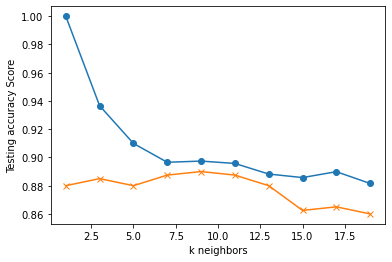

In [26]:
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.savefig('Resources/images/red_top5_features_KNN.jpg')
plt.show()

In [27]:
 # Note that k: 15 seems to be the best choice for this dataset
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train_scaled, y_train)
print('k=15 Test Acc: %.3f' % knn.score(X_test_scaled, y_test))

k=15 Test Acc: 0.863


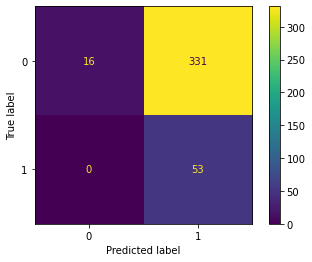

In [28]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

y_pred = knn.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

cm_display = ConfusionMatrixDisplay(cm).plot()
plt.savefig('Resources/images/red_top5_features_confu_KNN.jpg')